# Aashia Mehta
# CS 7641: Machine Learning
# Project 4: Markov Decision Processes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import hiive.mdptoolbox.example as example
import hiive.mdptoolbox.mdp as mdp
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
import seaborn as sns

# Sources:
# https://github.com/hiive/hiivemdptoolbox/blob/master/hiive/mdptoolbox/example.py
# https://github.com/hiive/hiivemdptoolbox
# https://pymdptoolbox.readthedocs.io/en/latest/api/mdp.html

['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_is_numpy_dev', '_lib', '_libs', '_np_version_under1p18', '_testing', '_tslib', '_typing', '_version', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'con

In [2]:
def plot_reward_iterations(run_stats, title, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    rewards = [stat['Reward'] for stat in run_stats]
    plt.title("Reward vs. Iteration \n(" + title + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Reward")
    plt.plot(iterations, rewards, label=label)
    plt.legend(loc='best')

In [179]:
def plot_time_iterations(run_stats, title, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    time = [stat['Time'] for stat in run_stats]
    plt.title("Time vs. Iteration \n(" + title + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Time")
    plt.plot(iterations, time, label=label)
    plt.legend(loc='best')
    plt.show()
    plt.close()

In [4]:
def plot_convergence_iterations(run_stats, title, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    rewards = [stat['Error'] for stat in run_stats]
    plt.title("Error vs. Iteration \n(" + title + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.plot(iterations, rewards, label=label)
    plt.legend(loc='best')

In [5]:
def plot_convergence_iterations_mean_V(run_stats, title, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    rewards = [stat['Error'] for stat in run_stats]
    mean_V = [stat['Mean V'] for stat in run_stats]
    change_in_mean_V = [mean_V[i+1] - mean_V[i] for i in range(len(mean_V)-1)]
    plt.title("Change in Mean V vs. Iteration \n(" + title + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Change in Mean V")
    plt.plot(iterations, rewards, label=label)
    plt.plot(iterations[1:], change_in_mean_V, label=label)
    plt.legend(loc='best')

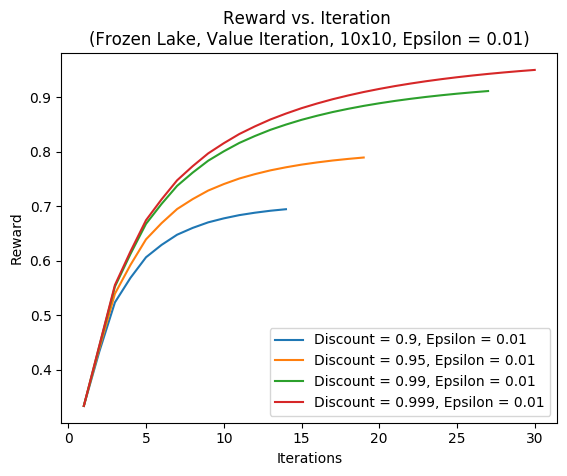

FROZEN LAKE (10) VI TIME:  0.018112897872924805


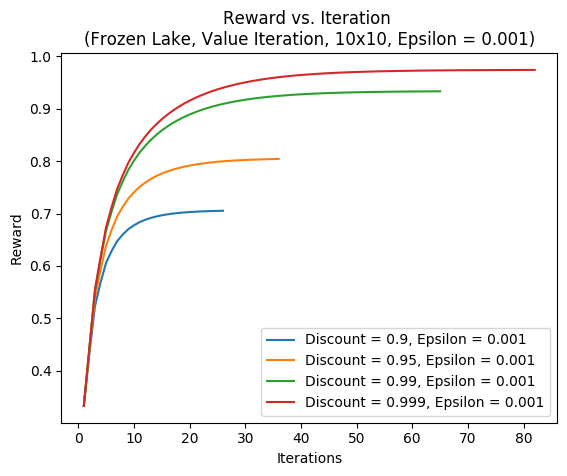

<Figure size 640x480 with 0 Axes>

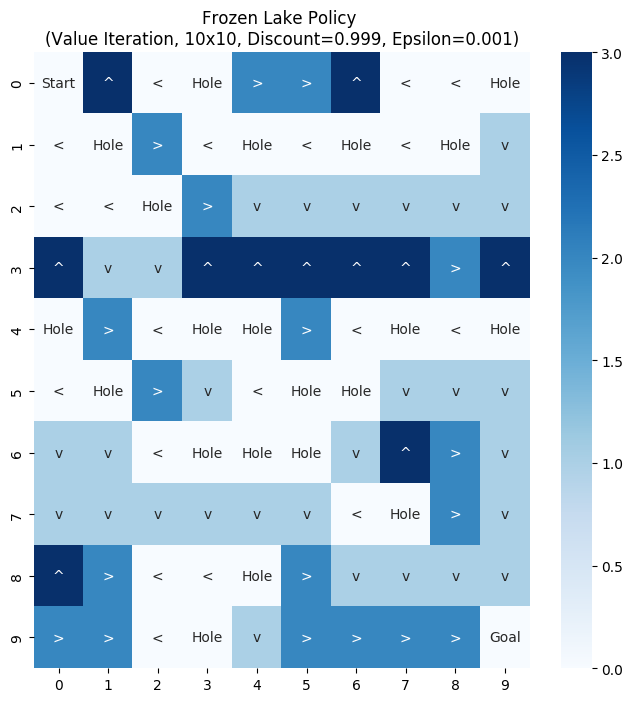

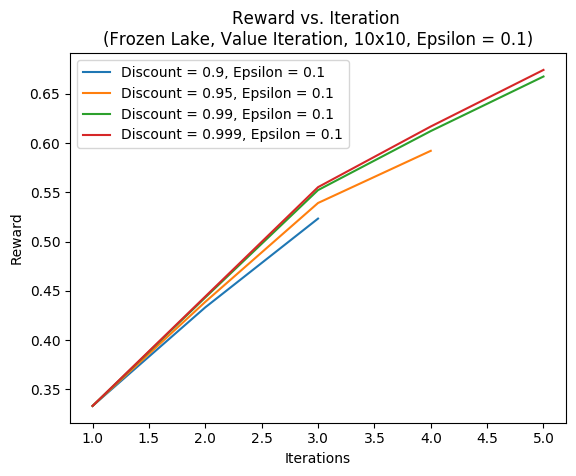

In [181]:
# FROZEN LAKE: VALUE ITERATION (10)
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.01)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 10x10, Epsilon = 0.01", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.01))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 10x10, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.001))
    if discounts[i] == 0.999:
        policy = vi.policy
        frozen_lake_vi_10_time = vi.time
        print("FROZEN LAKE (10) VI TIME: ", frozen_lake_vi_10_time)
        create_frozen_lake_map('Frozen Lake Policy \n(Value Iteration, 10x10, Discount=0.999, Epsilon=0.001)', random_map, policy, 10, figsize=8)
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.1)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 10x10, Epsilon = 0.1", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.1))
plt.show()
plt.close()

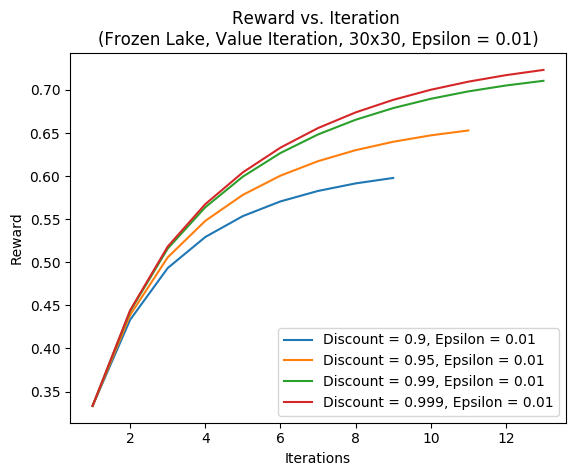

FROZEN LAKE (30) VI TIME:  0.02667093276977539


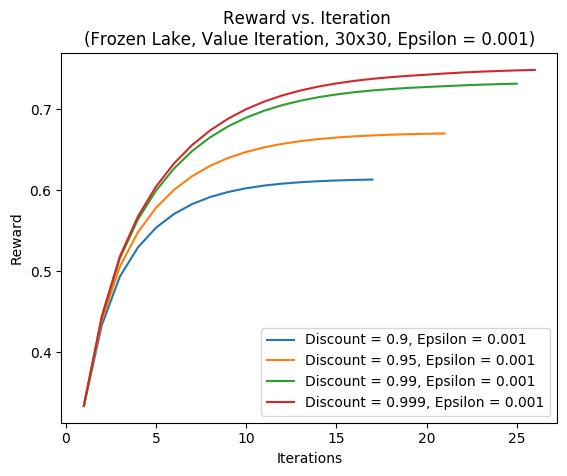

<Figure size 640x480 with 0 Axes>

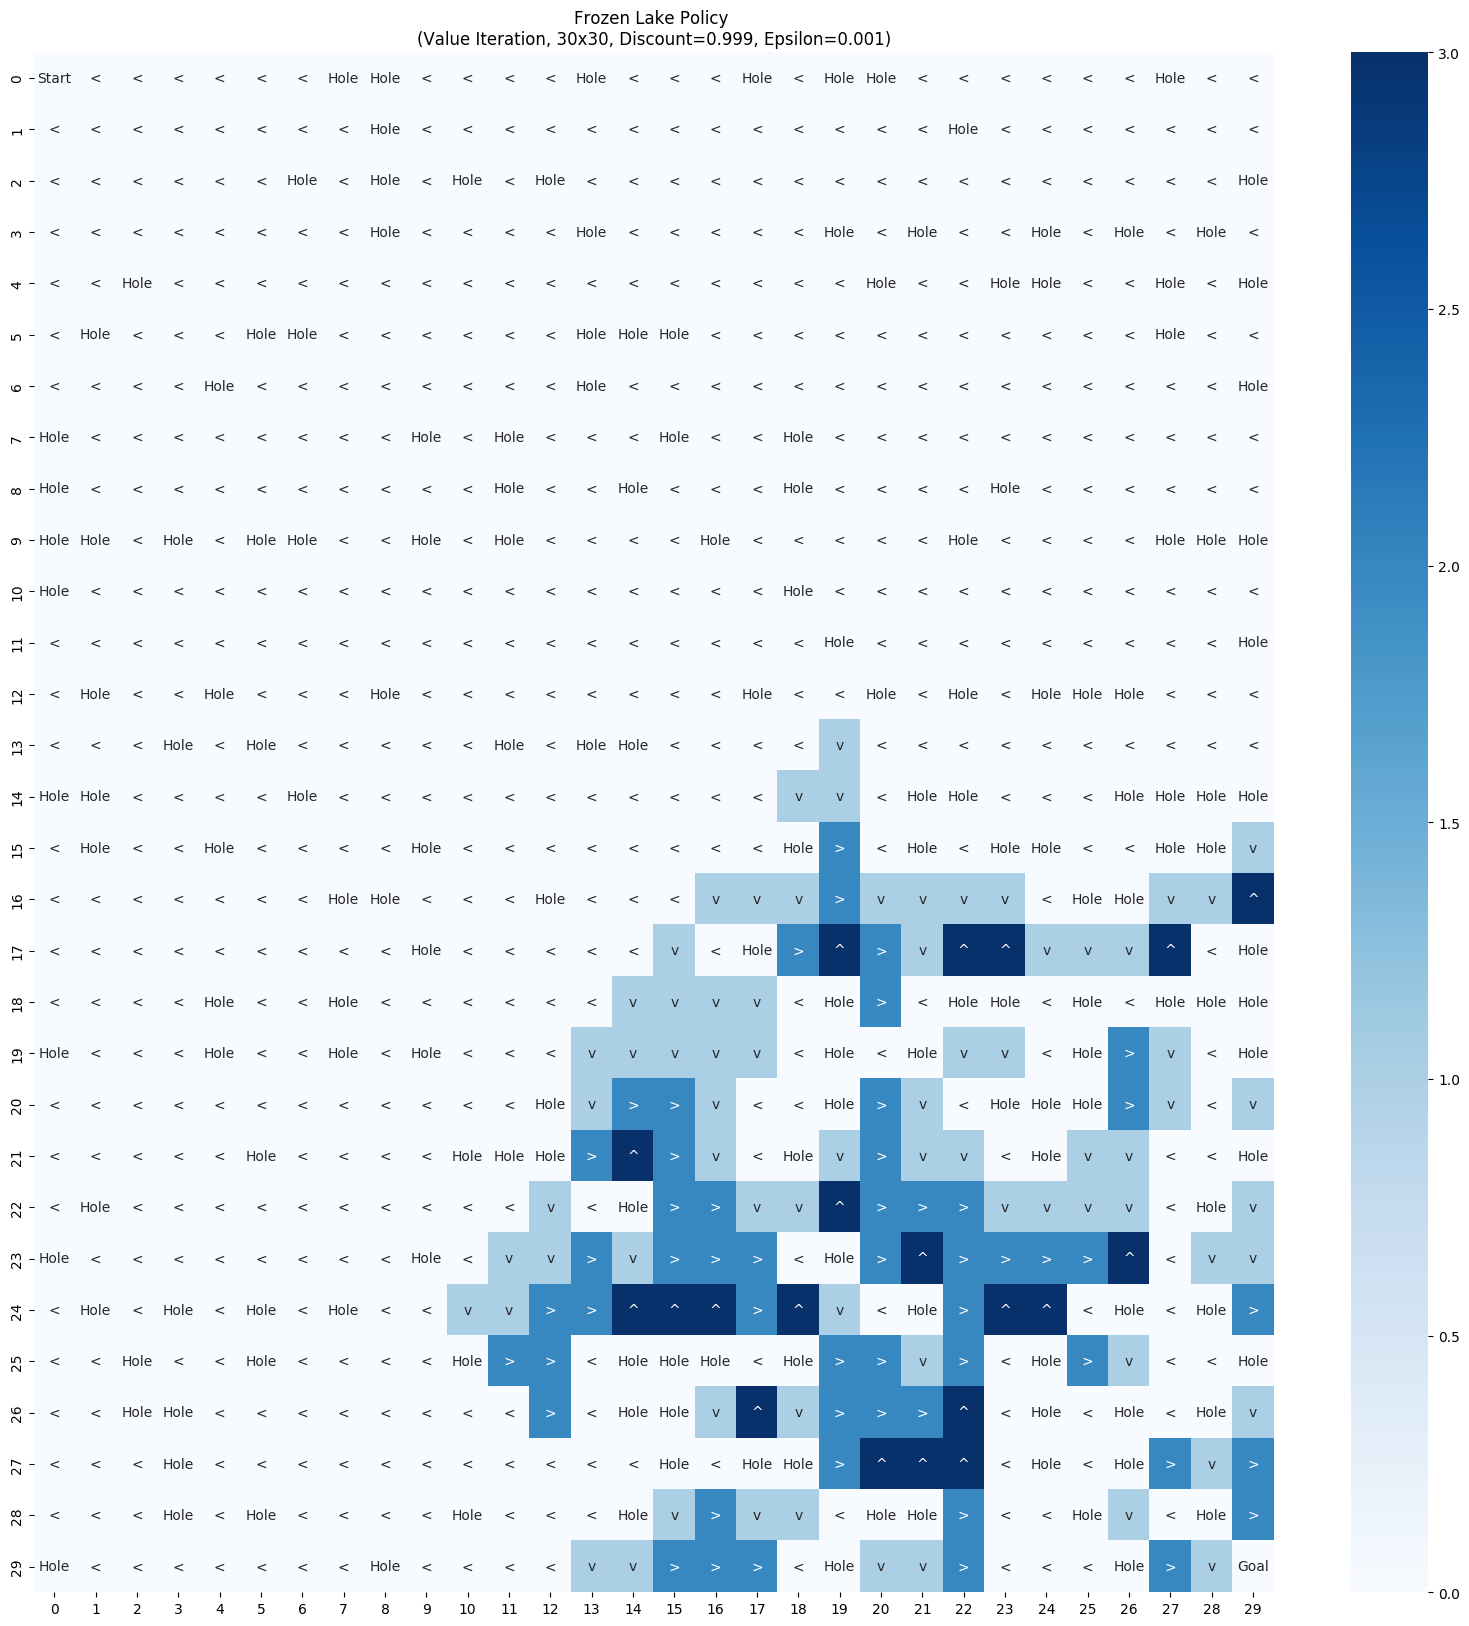

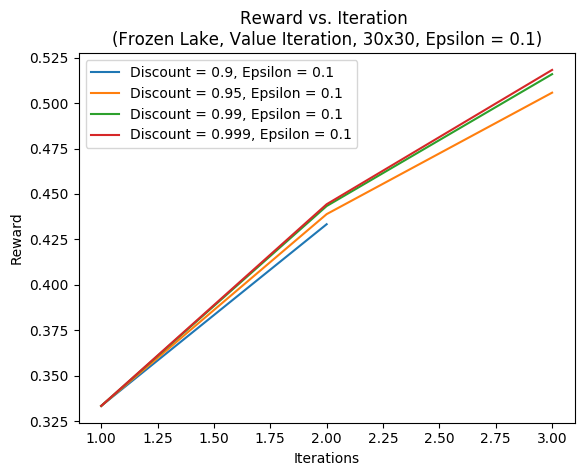

In [186]:
# FROZEN LAKE: VALUE ITERATION (30)
np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.01)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 30x30, Epsilon = 0.01", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.01))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 30x30, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.001))
    if discounts[i] == 0.999:
        policy = vi.policy
        frozen_lake_vi_30_time = vi.time
        print("FROZEN LAKE (30) VI TIME: ", frozen_lake_vi_30_time)
        create_frozen_lake_map('Frozen Lake Policy \n(Value Iteration, 30x30, Discount=0.999, Epsilon=0.001)', random_map, policy, 30, figsize=20)
    
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.1)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 30x30, Epsilon = 0.1", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.1))
plt.show()
plt.close()

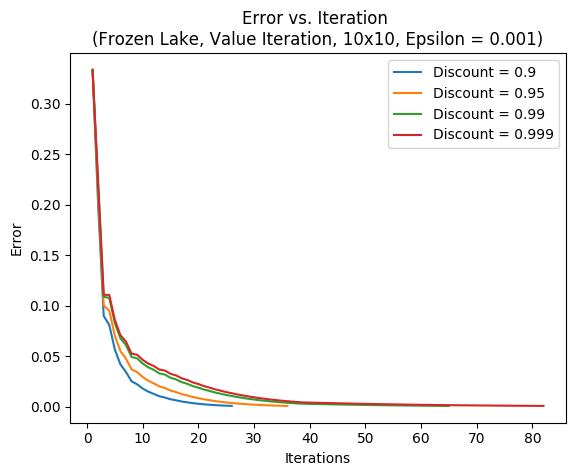

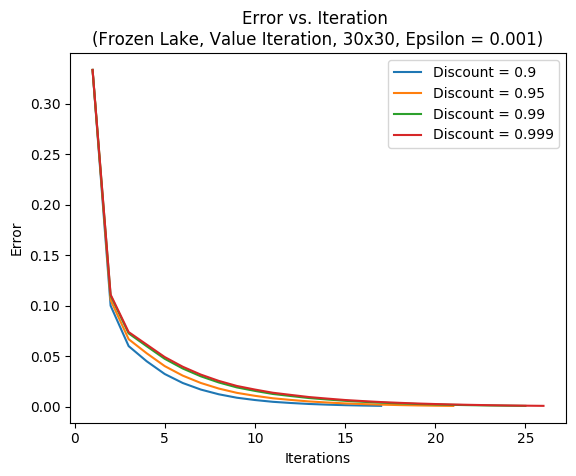

In [46]:
# FROZEN LAKE: VALUE ITERATION (10) CONVERGENCE PLOT
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_convergence_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 10x10, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

# FROZEN LAKE: VALUE ITERATION (30) CONVERGENCE PLOT
np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_convergence_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 30x30, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

FROZEN LAKE (10) PI TIME:  0.17728686332702637


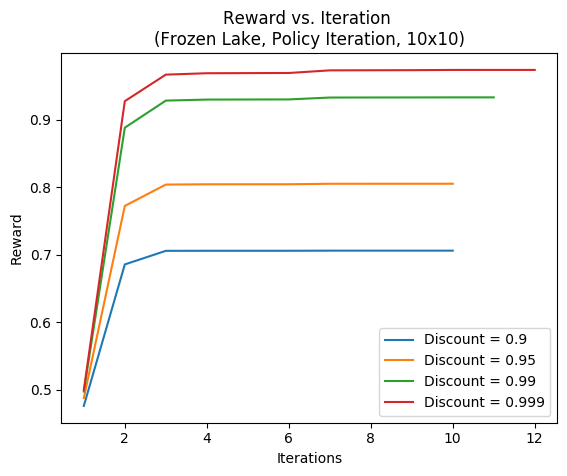

<Figure size 640x480 with 0 Axes>

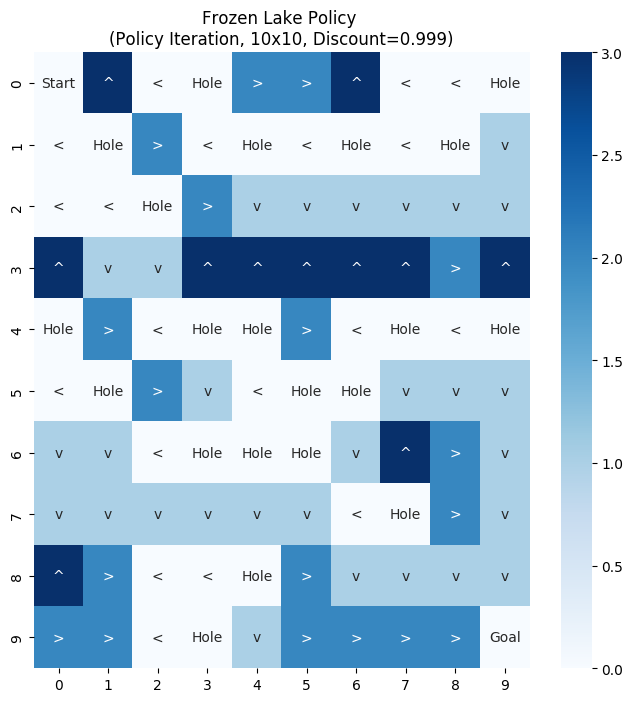

FROZEN LAKE (30) PI TIME:  6.48161506652832


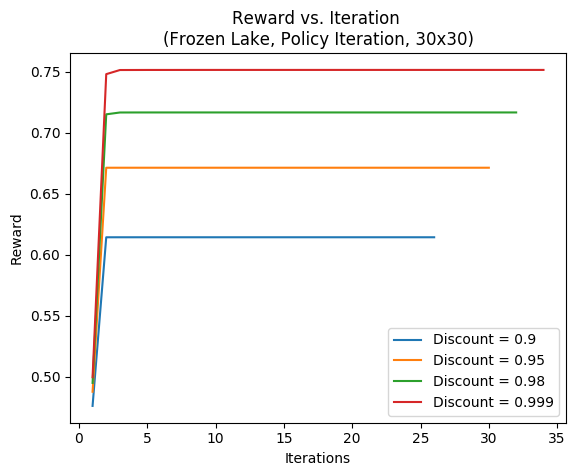

<Figure size 640x480 with 0 Axes>

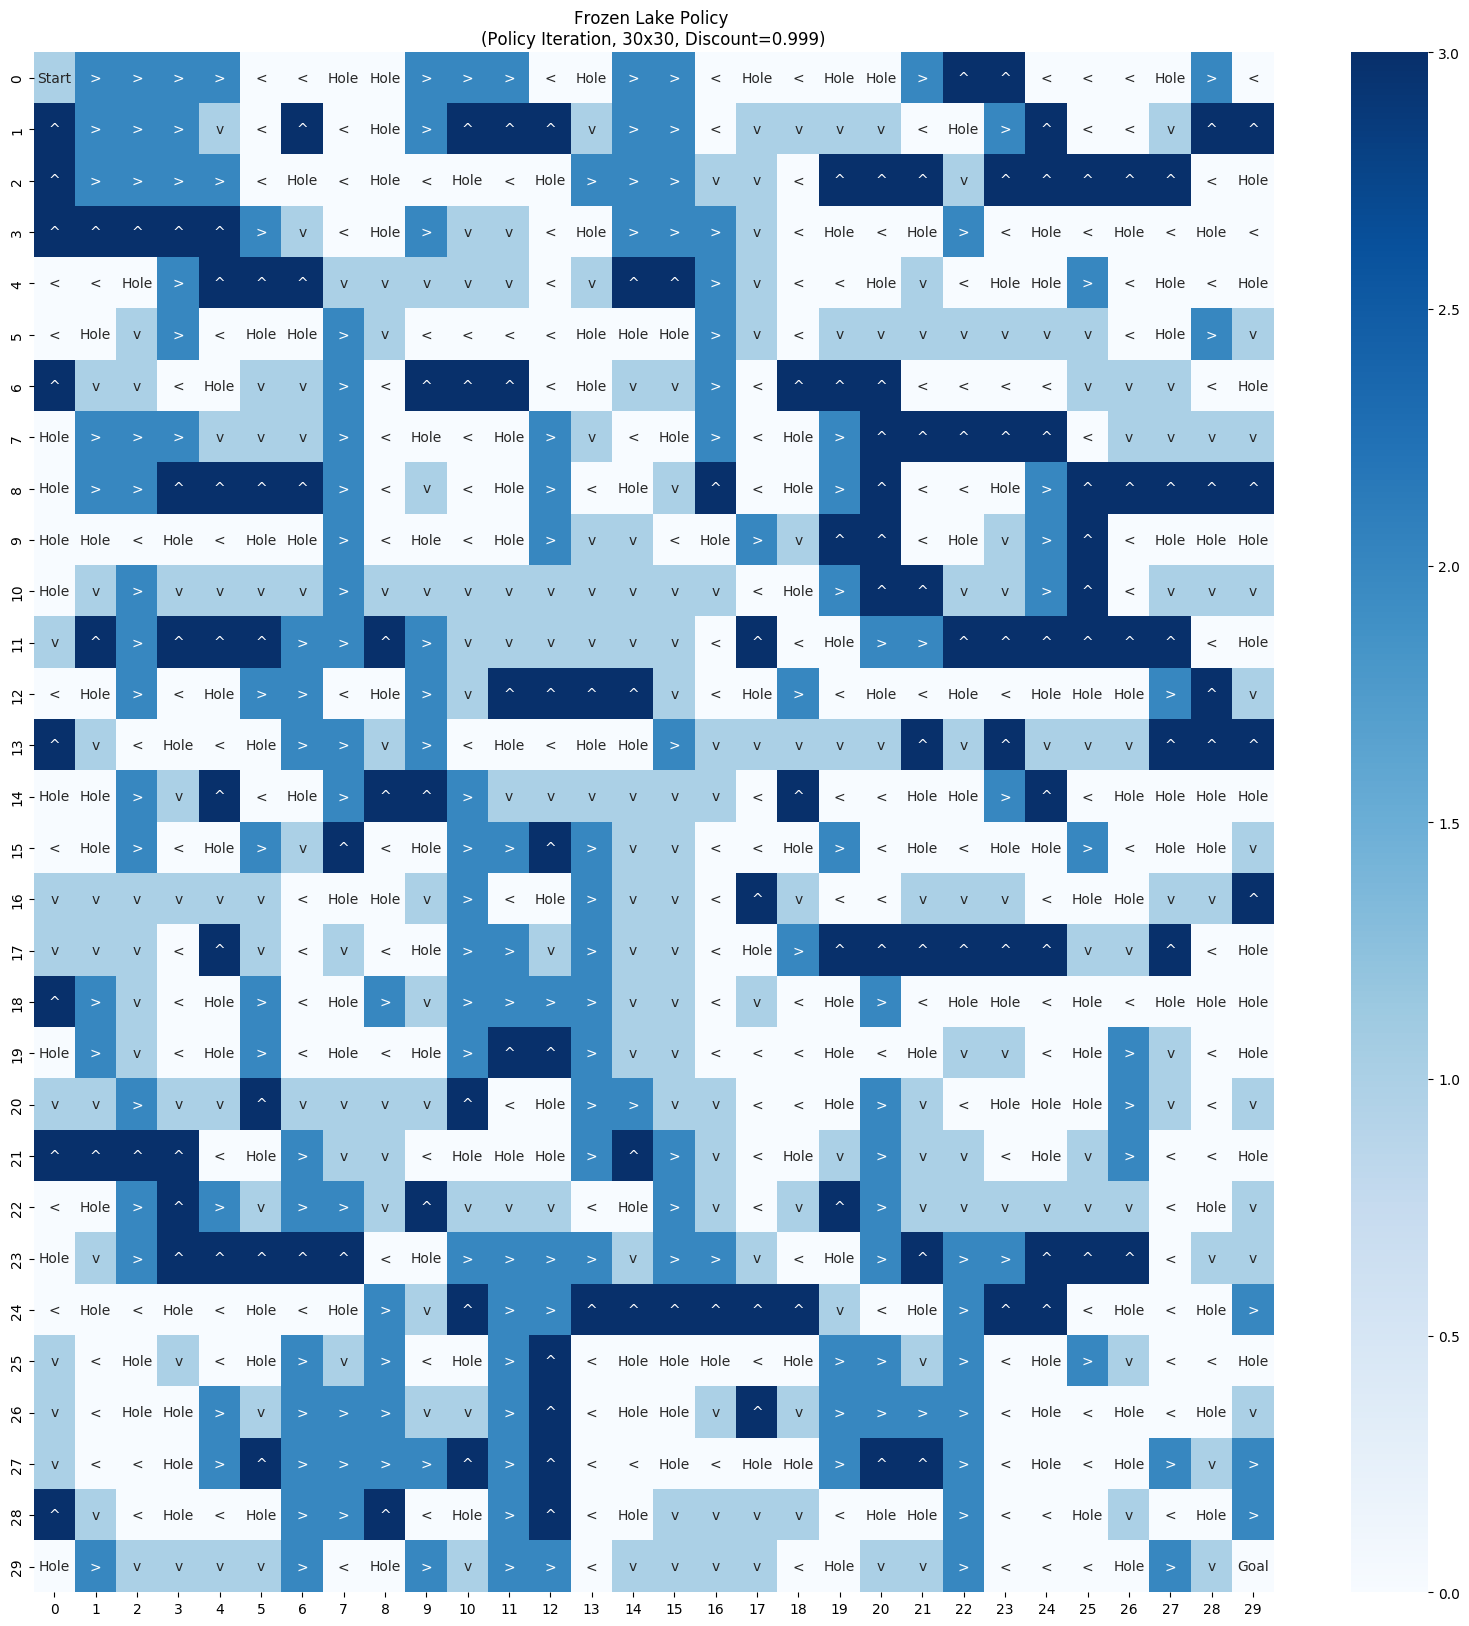

In [188]:
# FROZEN LAKE: POLICY ITERATION (10)
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_reward_iterations(pi_run_stats, "Frozen Lake, Policy Iteration, 10x10", 
                           "Discount = " + str(discounts[i]))
    if discounts[i] == 0.999:
        policy = pi.policy
        frozen_lake_pi_10_time = pi.time
        print("FROZEN LAKE (10) PI TIME: ", frozen_lake_pi_10_time)
        create_frozen_lake_map('Frozen Lake Policy \n(Policy Iteration, 10x10, Discount=0.999)', random_map, policy, 10, figsize=8)
plt.show()
plt.close()

# FROZEN LAKE: POLICY ITERATION (30)
np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.98, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_reward_iterations(pi_run_stats, "Frozen Lake, Policy Iteration, 30x30", 
                           "Discount = " + str(discounts[i]))
    if discounts[i] == 0.999:
        policy = pi.policy
        frozen_lake_pi_30_time = pi.time
        print("FROZEN LAKE (30) PI TIME: ", frozen_lake_pi_30_time)
        create_frozen_lake_map('Frozen Lake Policy \n(Policy Iteration, 30x30, Discount=0.999)', random_map, policy, 30, figsize=20)
plt.show()
plt.close()

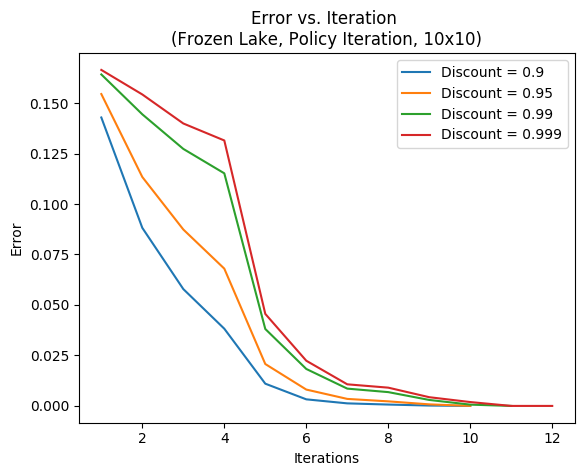

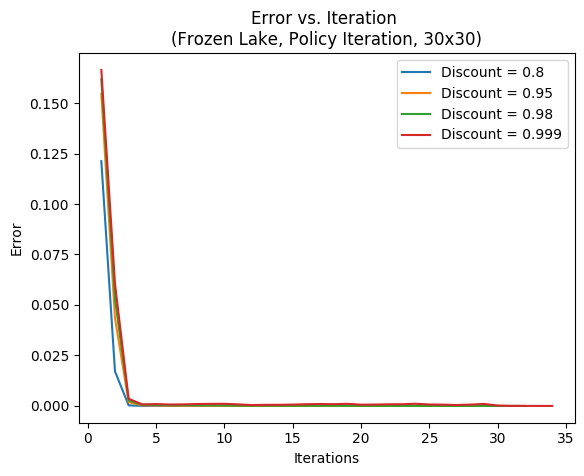

In [50]:
# FROZEN LAKE: POLICY ITERATION (10) CONVERGENCE PLOT
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_convergence_iterations(pi_run_stats, "Frozen Lake, Policy Iteration, 10x10", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

# FROZEN LAKE: POLICY ITERATION (30) CONVERGENCE PLOT
np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.8, 0.95, 0.98, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_convergence_iterations(pi_run_stats, "Frozen Lake, Policy Iteration, 30x30", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

In [70]:
def create_frozen_lake_map(title, random_map, policy, size, figsize):
    random_map_reshaped = []
    for string in random_map:
        random_map_reshaped.append(list(string))
    random_map_reshaped = np.array(random_map_reshaped)
    # print(random_map_reshaped)

    policy_reshaped = np.reshape(policy, (size, size))
    # print(policy_reshaped)

    policy_arrows = policy_reshaped.astype(str)
    policy_arrows[policy_arrows=='0'] = '<'
    policy_arrows[policy_arrows=='1'] = 'v'
    policy_arrows[policy_arrows=='2'] = '>'
    policy_arrows[policy_arrows=='3'] = '^'
    policy_arrows[random_map_reshaped=='S'] = 'Start'
    policy_arrows[random_map_reshaped=='G'] = 'Goal'
    policy_arrows[random_map_reshaped=='H'] = 'Hole'
    # print(policy_arrows)

    plt.figure()
    fig, ax = plt.subplots(figsize=(figsize, figsize))
    ax.set_title(title)
    heatmap = sns.heatmap(policy_reshaped, annot=policy_arrows, fmt='', cmap='Blues', ax=ax)
    plt.show()
    plt.close()

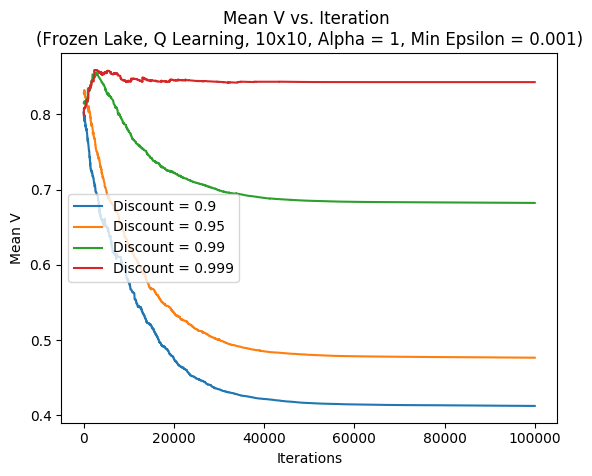

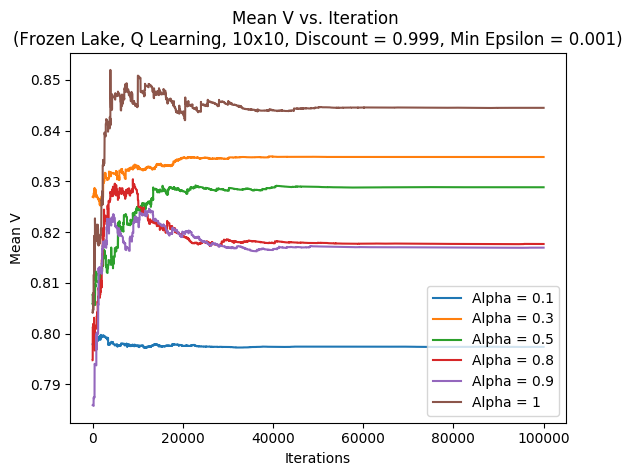

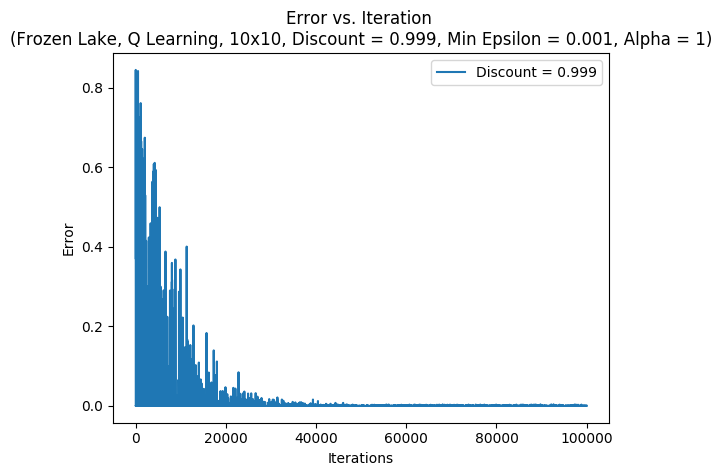

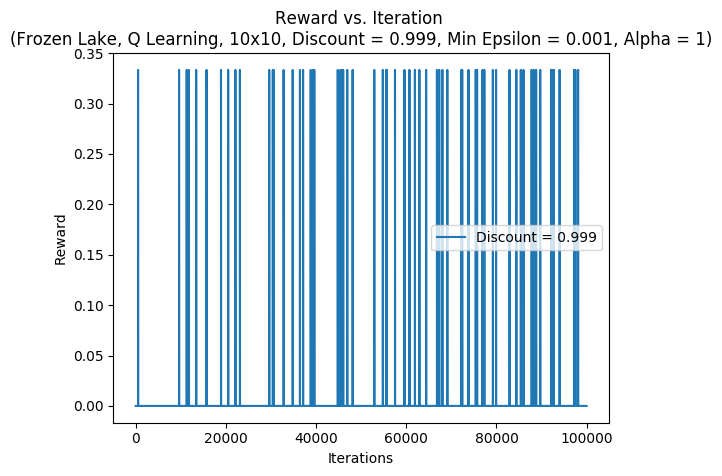

FROZEN LAKE (10) QL TIME:  5.152400255203247


<Figure size 640x480 with 0 Axes>

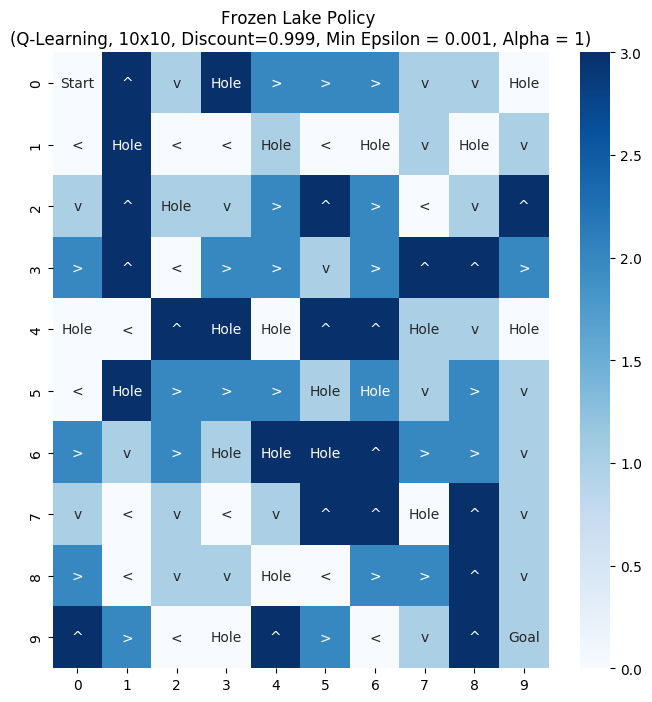

In [193]:
# FROZEN LAKE: Q LEARNING (10)

np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)
discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    ql = mdp.QLearning(P, R, discounts[i], n_iter=100000,
                   epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.random_sample(ql.Q.shape)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Frozen Lake, Q Learning, 10x10, Alpha = 1, Min Epsilon = 0.001)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Discount = " + str(discounts[i]))
    plt.legend(loc='best')
plt.show()
plt.close()

alphas = [0.1, 0.3, 0.5, 0.8, 0.9, 1]
for i in range(len(alphas)):
    ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
                   epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = alphas[i], alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.random_sample(ql.Q.shape)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Frozen Lake, Q Learning, 10x10, Discount = 0.999, Min Epsilon = 0.001)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Alpha = " + str(alphas[i]))
    plt.legend(loc='best')
plt.show()
plt.close()


ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
               epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
               alpha_decay=0.9999, alpha = 1, alpha_min=0.01, run_stat_frequency=1)
# Randomly intialize Q
ql.Q = np.random.random_sample(ql.Q.shape)
ql.run()
ql_run_stats = ql.run_stats
plot_convergence_iterations(ql_run_stats, "Frozen Lake, Q Learning, 10x10, Discount = 0.999, Min Epsilon = 0.001, Alpha = 1", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

plot_reward_iterations(ql_run_stats, "Frozen Lake, Q Learning, 10x10, Discount = 0.999, Min Epsilon = 0.001, Alpha = 1", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

policy = ql.policy
frozen_lake_ql_10_time = ql.time
print("FROZEN LAKE (10) QL TIME: ", frozen_lake_ql_10_time)
create_frozen_lake_map('Frozen Lake Policy \n(Q-Learning, 10x10, Discount=0.999, Min Epsilon = 0.001, Alpha = 1)', random_map, policy, 10, figsize=8)

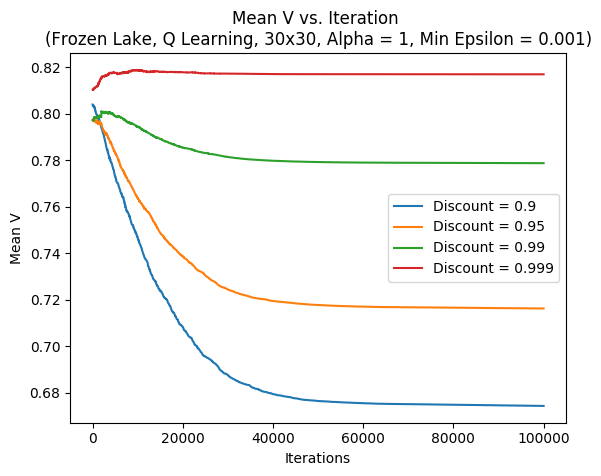

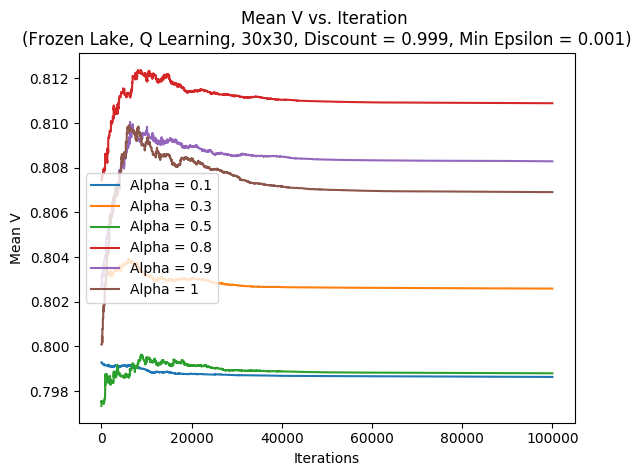

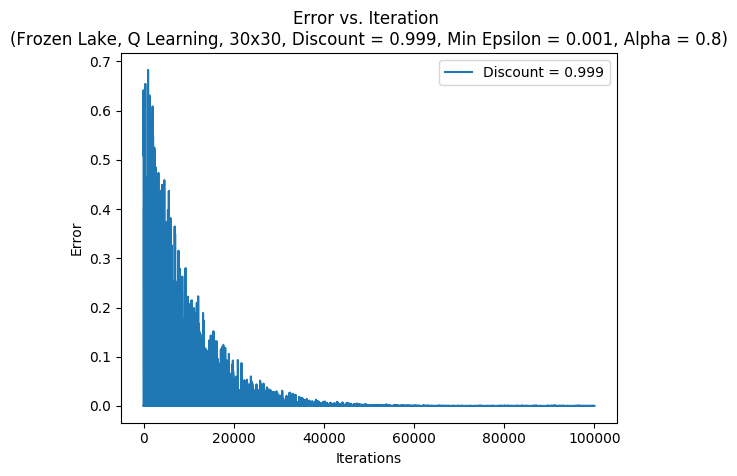

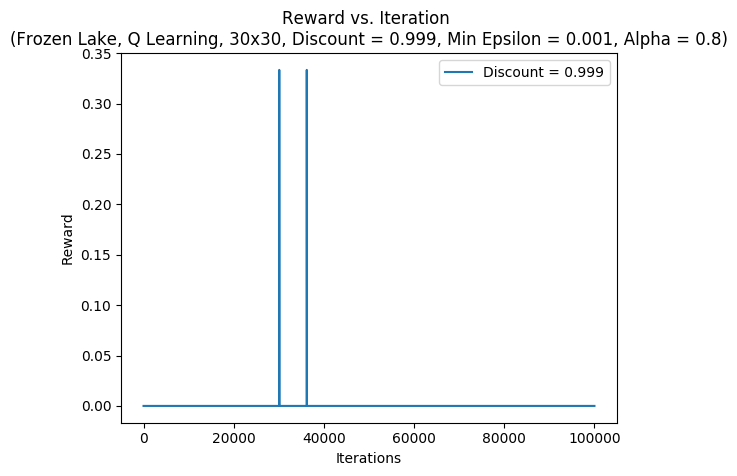

FROZEN LAKE (30) QL TIME:  24.322376012802124


<Figure size 640x480 with 0 Axes>

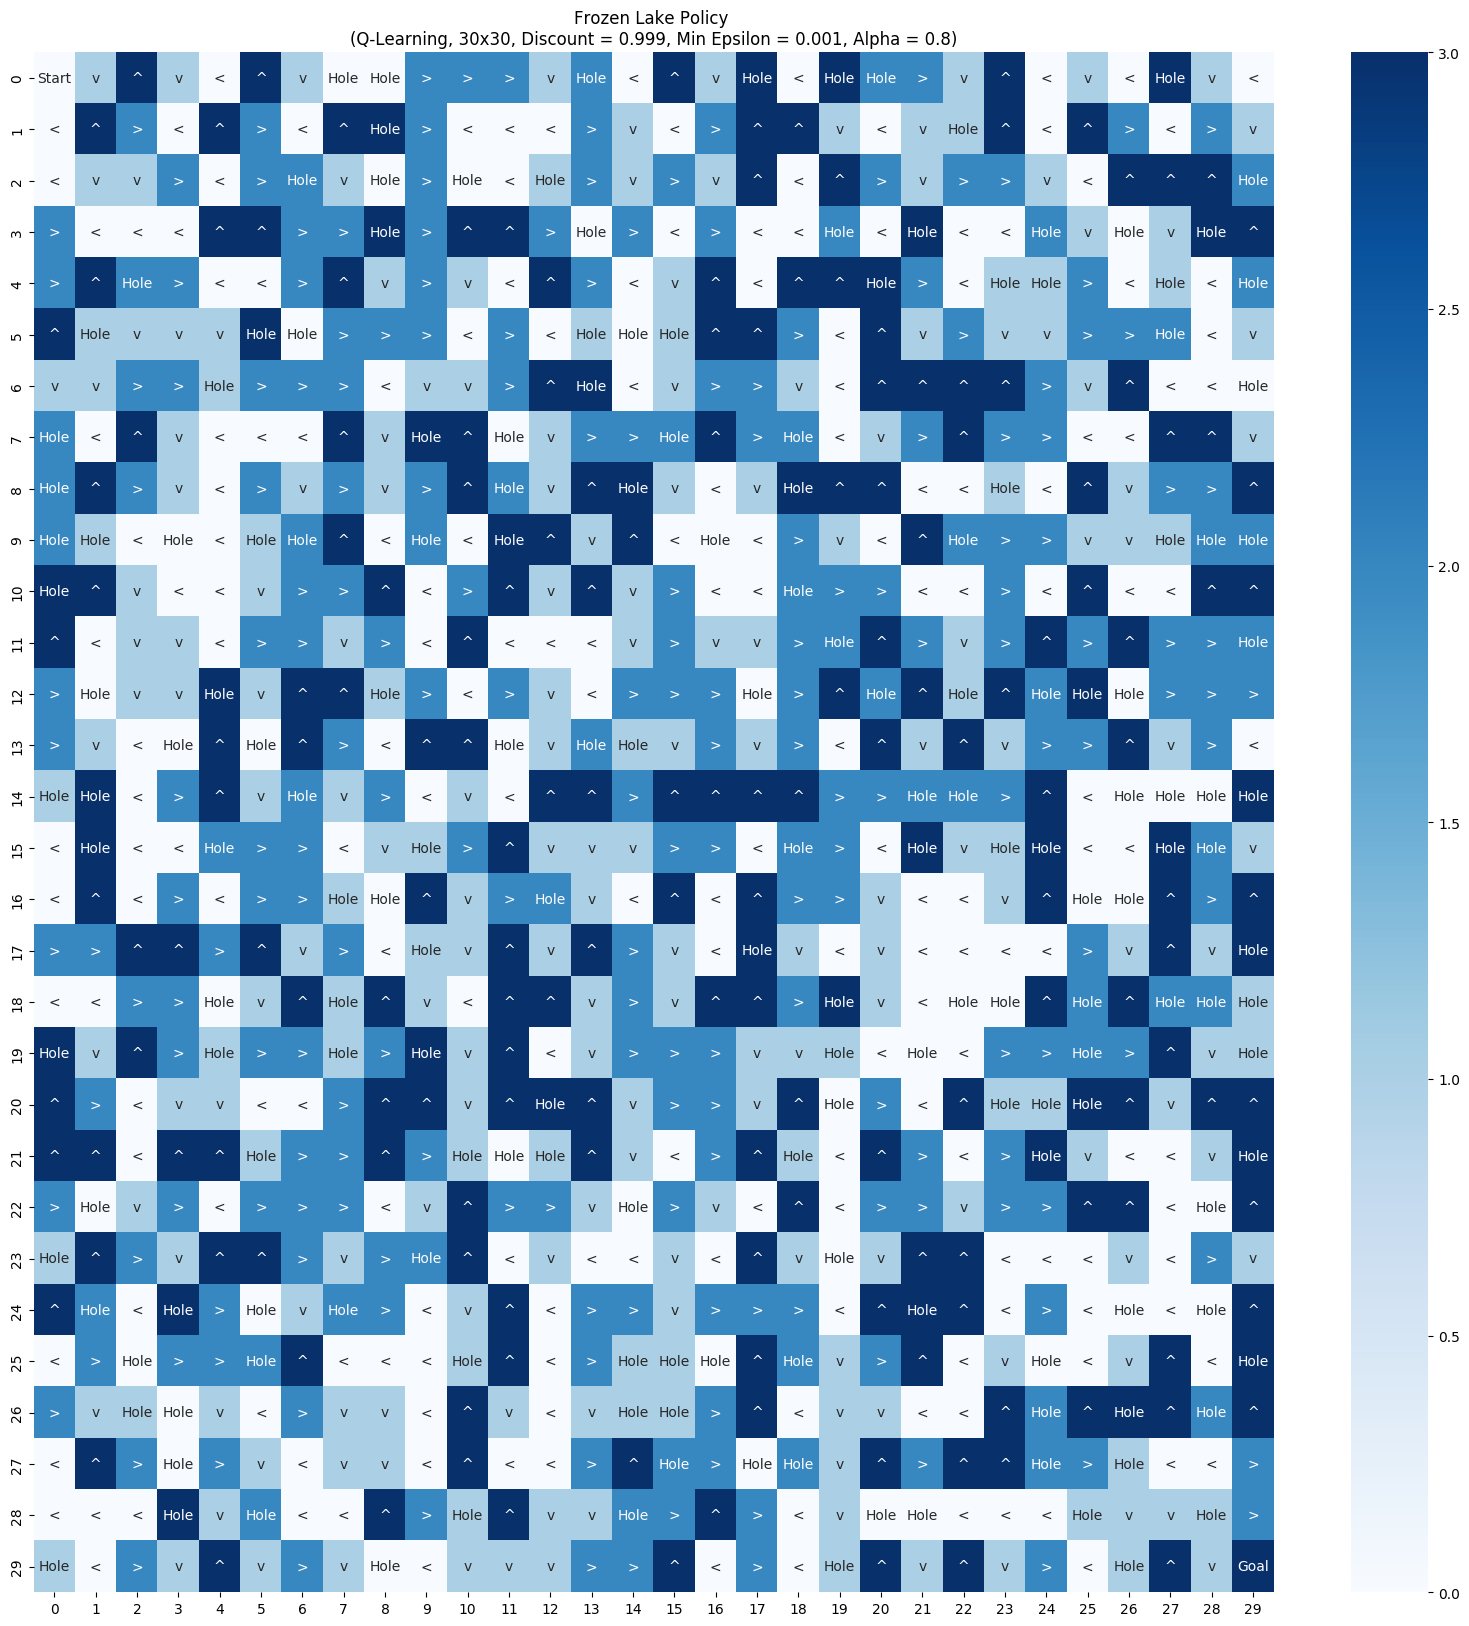

In [200]:
# FROZEN LAKE: Q LEARNING (30)

np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)
discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    ql = mdp.QLearning(P, R, discounts[i], n_iter=100000,
                   epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.random_sample(ql.Q.shape)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Frozen Lake, Q Learning, 30x30, Alpha = 1, Min Epsilon = 0.001)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Discount = " + str(discounts[i]))
    plt.legend(loc='best')
plt.show()
plt.close()

alphas = [0.1, 0.3, 0.5, 0.8, 0.9, 1]
for i in range(len(alphas)):
    ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
                   epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = alphas[i], alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.random_sample(ql.Q.shape)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Frozen Lake, Q Learning, 30x30, Discount = 0.999, Min Epsilon = 0.001)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Alpha = " + str(alphas[i]))
    plt.legend(loc='best')
plt.show()
plt.close()


ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
               epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
               alpha_decay=0.9999, alpha = 0.8, alpha_min=0.001, run_stat_frequency=1)
# Randomly intialize Q
ql.Q = np.random.random_sample(ql.Q.shape)
ql.run()
ql_run_stats = ql.run_stats
plot_convergence_iterations(ql_run_stats, "Frozen Lake, Q Learning, 30x30, Discount = 0.999, Min Epsilon = 0.001, Alpha = 0.8", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

plot_reward_iterations(ql_run_stats, "Frozen Lake, Q Learning, 30x30, Discount = 0.999, Min Epsilon = 0.001, Alpha = 0.8", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

policy = ql.policy
frozen_lake_ql_30_time = ql.time
print("FROZEN LAKE (30) QL TIME: ", frozen_lake_ql_30_time)
create_frozen_lake_map('Frozen Lake Policy \n(Q-Learning, 30x30, Discount = 0.999, Min Epsilon = 0.001, Alpha = 0.8)', random_map, policy, 30, figsize=20)

In [201]:
print("FROZEN LAKE (10) PI TIME: ", frozen_lake_vi_10_time)
print("FROZEN LAKE (30) PI TIME: ", frozen_lake_vi_30_time)
print("FROZEN LAKE (10) VI TIME: ", frozen_lake_pi_10_time)
print("FROZEN LAKE (30) VI TIME: ", frozen_lake_pi_30_time)
print("FROZEN LAKE (10) QL TIME: ", frozen_lake_ql_10_time)
print("FROZEN LAKE (30) QL TIME: ", frozen_lake_ql_30_time)

FROZEN LAKE (10) PI TIME:  0.018112897872924805
FROZEN LAKE (30) PI TIME:  0.02667093276977539
FROZEN LAKE (10) VI TIME:  0.17728686332702637
FROZEN LAKE (30) VI TIME:  6.48161506652832
FROZEN LAKE (10) QL TIME:  5.152400255203247
FROZEN LAKE (30) QL TIME:  24.322376012802124


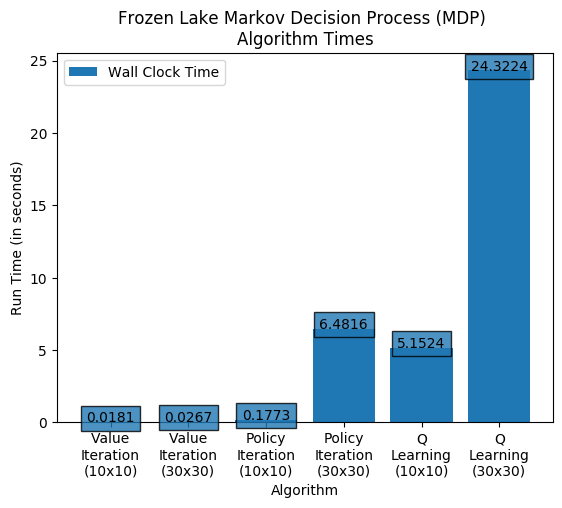

In [210]:
from textwrap import wrap

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(alpha =.8))

algorithms = ['Value Iteration (10x10)', 'Value Iteration (30x30)','Policy Iteration (10x10)', 'Policy Iteration (30x30)', 'Q Learning (10x10)','Q Learning (30x30)']
times = [frozen_lake_vi_10_time, frozen_lake_vi_30_time, frozen_lake_pi_10_time, frozen_lake_pi_30_time, frozen_lake_ql_10_time, frozen_lake_ql_30_time]
rounded_times = [round(i, 4) for i in times]
algorithms = ['\n'.join(wrap(x, 9)) for x in algorithms]
plt.title("Frozen Lake Markov Decision Process (MDP) \nAlgorithm Times")
plt.xlabel("Algorithm")
plt.ylabel("Run Time (in seconds)")
plt.bar(algorithms, rounded_times, label="Wall Clock Time")
addlabels(algorithms, rounded_times)
plt.legend(loc="best")
plt.show()

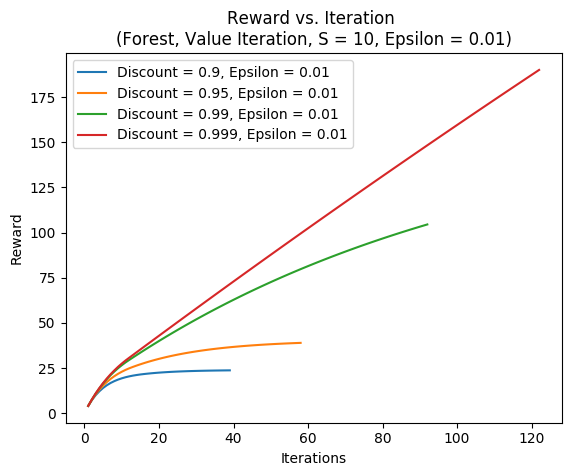

FOREST (10) VI TIME:  0.004441976547241211


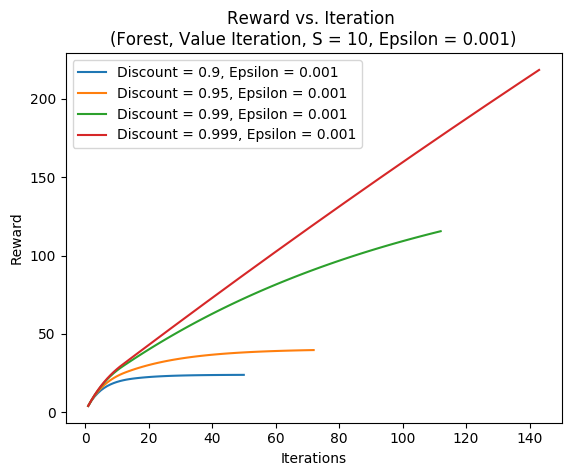

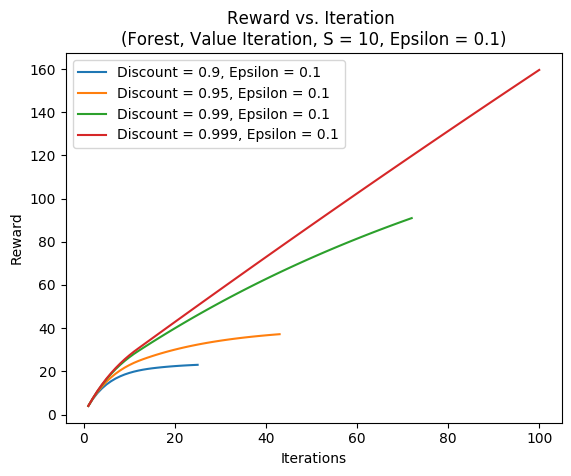

In [237]:
# FOREST: VALUE ITERATION (10)
np.random.seed(0)
P, R = example.forest(S=10)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.01)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Forest, Value Iteration, S = 10, Epsilon = 0.01", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.01))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Forest, Value Iteration, S = 10, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.001))
    if discounts[i] == 0.999:
        policy = vi.policy
        forest_vi_10_time = vi.time
        print("FOREST (10) VI TIME: ", forest_vi_10_time)
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.1)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Forest, Value Iteration, S = 10, Epsilon = 0.1", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.1))
plt.show()
plt.close()

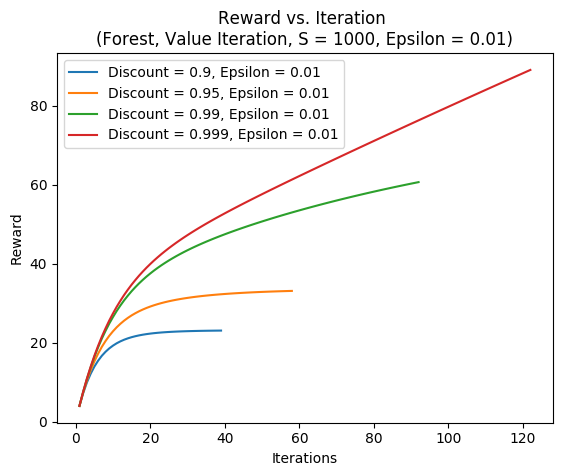

FOREST (1000) VI TIME:  0.09621095657348633


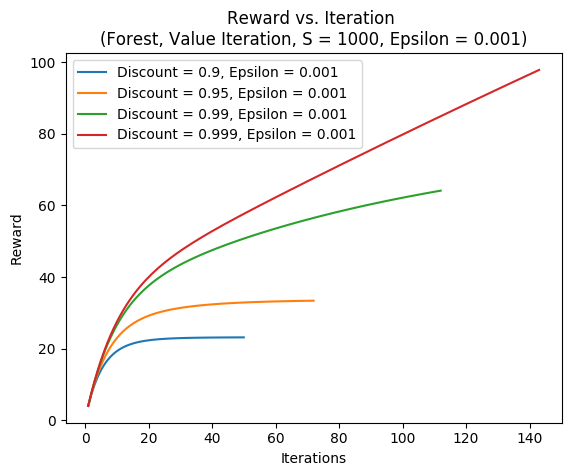

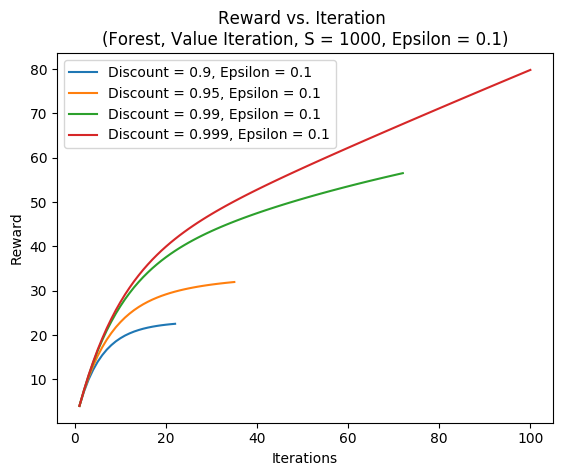

In [229]:
# FOREST: VALUE ITERATION (1000)
np.random.seed(0)
P, R = example.forest(S=1000)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.01)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Forest, Value Iteration, S = 1000, Epsilon = 0.01", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.01))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Forest, Value Iteration, S = 1000, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.001))
    if discounts[i] == 0.999:
        policy = vi.policy
        forest_vi_1000_time = vi.time
        print("FOREST (1000) VI TIME: ", forest_vi_1000_time)
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.1)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Forest, Value Iteration, S = 1000, Epsilon = 0.1", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.1))
plt.show()
plt.close()

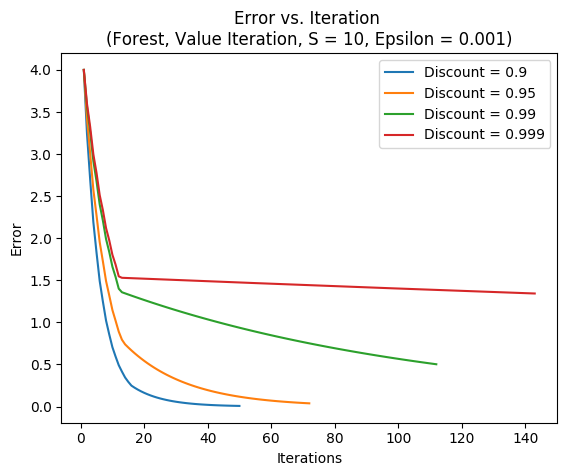

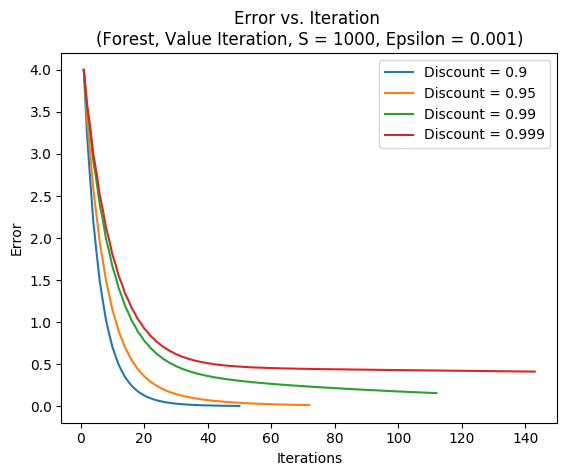

In [230]:
# FOREST: VALUE ITERATION (10) CONVERGENCE PLOT
np.random.seed(0)
P, R = example.forest(S=10)

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_convergence_iterations(vi_run_stats, "Forest, Value Iteration, S = 10, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

# FOREST: VALUE ITERATION (1000) CONVERGENCE PLOT
np.random.seed(0)
P, R = example.forest(S=1000)

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_convergence_iterations(vi_run_stats, "Forest, Value Iteration, S = 1000, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

FOREST (10) PI TIME:  0.38623881340026855


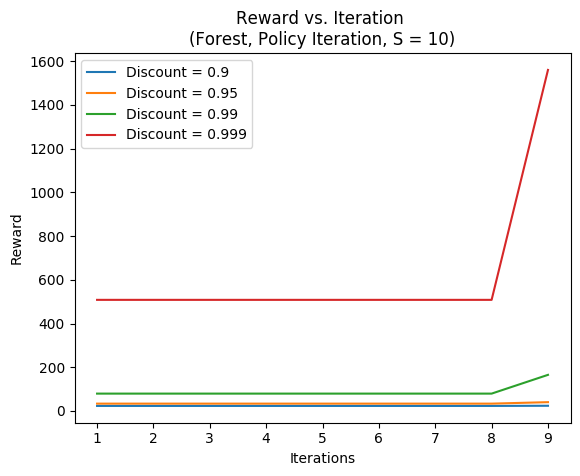

FOREST (1000) PI TIME:  70.8638219833374


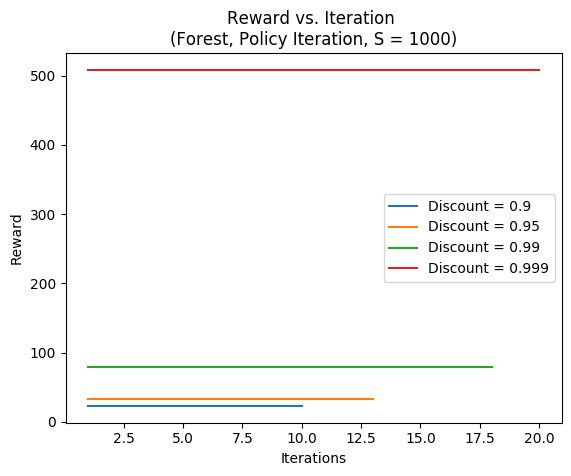

In [243]:
# FOREST: POLICY ITERATION (10)
np.random.seed(0)
P, R = example.forest(S=10)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_reward_iterations(pi_run_stats, "Forest, Policy Iteration, S = 10", 
                           "Discount = " + str(discounts[i]))
    if discounts[i] == 0.999:
        policy = pi.policy
        forest_pi_10_time = pi.time
        print("FOREST (10) PI TIME: ", forest_pi_10_time)
plt.show()
plt.close()

# FOREST: POLICY ITERATION (1000)
np.random.seed(0)
P, R = example.forest(S=1000)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_reward_iterations(pi_run_stats, "Forest, Policy Iteration, S = 1000", 
                           "Discount = " + str(discounts[i]))
    if discounts[i] == 0.999:
        policy = pi.policy
        forest_pi_1000_time = pi.time
        print("FOREST (1000) PI TIME: ", forest_pi_1000_time)
plt.show()
plt.close()

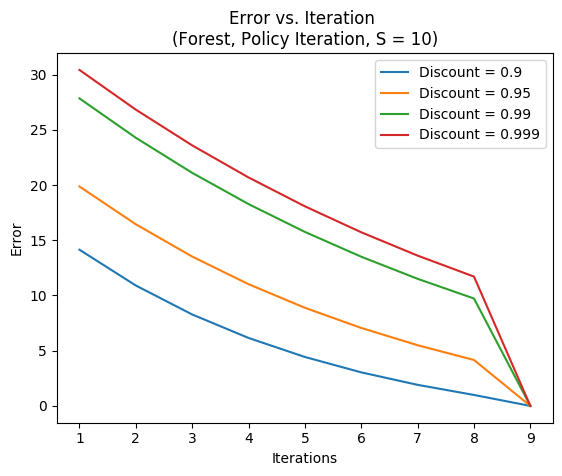

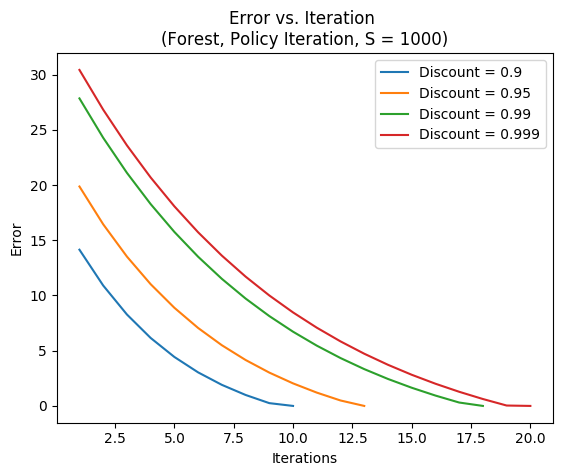

In [233]:
# FOREST: POLICY ITERATION (10) CONVERGENCE PLOT
np.random.seed(0)
P, R = example.forest(S=10)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_convergence_iterations(pi_run_stats, "Forest, Policy Iteration, S = 10", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

# FOREST: POLICY ITERATION (1000) CONVERGENCE PLOT
np.random.seed(0)
P, R = example.forest(S=1000)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_convergence_iterations(pi_run_stats, "Forest, Policy Iteration, S = 1000", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

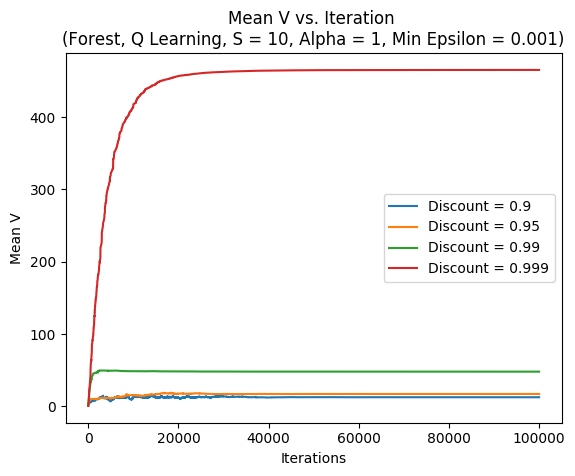

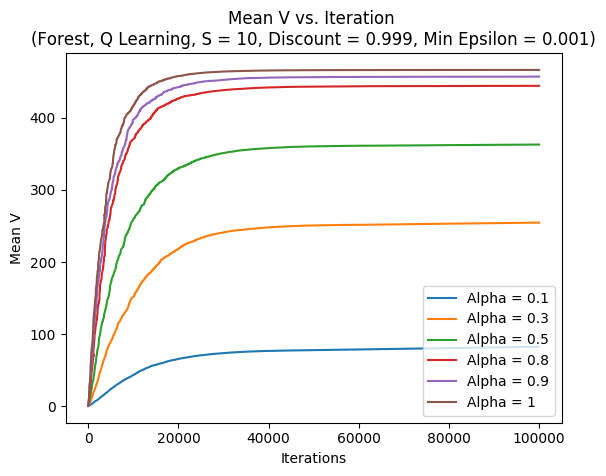

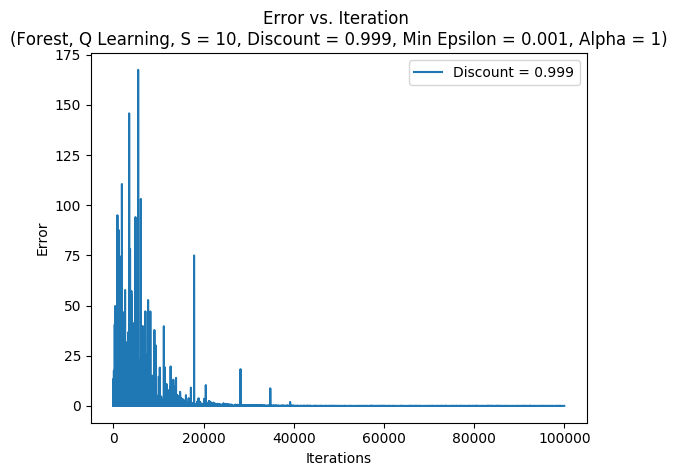

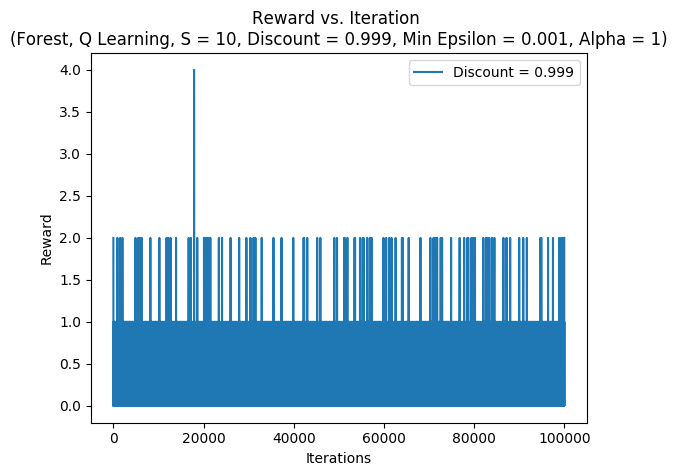

FOREST (10) QL TIME:  2.657099962234497


In [246]:
# FOREST: Q LEARNING (10)

np.random.seed(0)
P, R = example.forest(S=10)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    ql = mdp.QLearning(P, R, discounts[i], n_iter=100000,
                   epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.rand(ql.S, ql.A)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Forest, Q Learning, S = 10, Alpha = 1, Min Epsilon = 0.001)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Discount = " + str(discounts[i]))
    plt.legend(loc='best')
plt.show()
plt.close()

alphas = [0.1, 0.3, 0.5, 0.8, 0.9, 1]
for i in range(len(alphas)):
    ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
                   epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = alphas[i], alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.rand(ql.S, ql.A)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Forest, Q Learning, S = 10, Discount = 0.999, Min Epsilon = 0.001)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Alpha = " + str(alphas[i]))
    plt.legend(loc='best')
plt.show()
plt.close()


ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
               epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
               alpha_decay=0.9999, alpha = 1, alpha_min=0.01, run_stat_frequency=1)
# Randomly intialize Q
ql.Q = np.random.rand(ql.S, ql.A)
ql.run()
ql_run_stats = ql.run_stats
plot_convergence_iterations(ql_run_stats, "Forest, Q Learning, S = 10, Discount = 0.999, Min Epsilon = 0.001, Alpha = 1", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

plot_reward_iterations(ql_run_stats, "Forest, Q Learning, S = 10, Discount = 0.999, Min Epsilon = 0.001, Alpha = 1", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

policy = ql.policy
forest_ql_10_time = ql.time
print("FOREST (10) QL TIME: ", forest_ql_10_time)

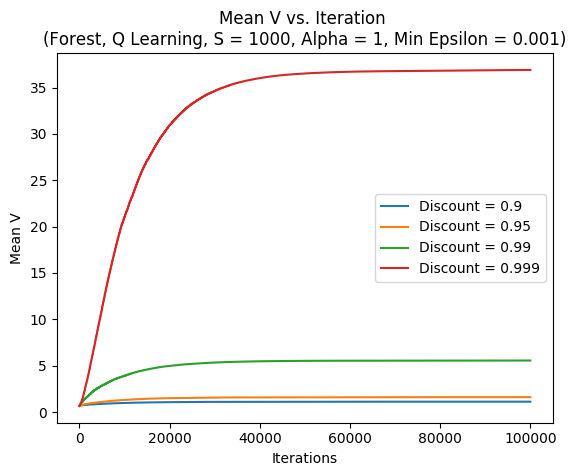

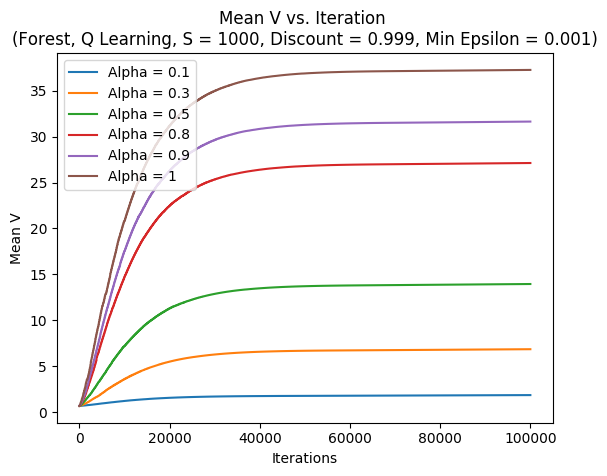

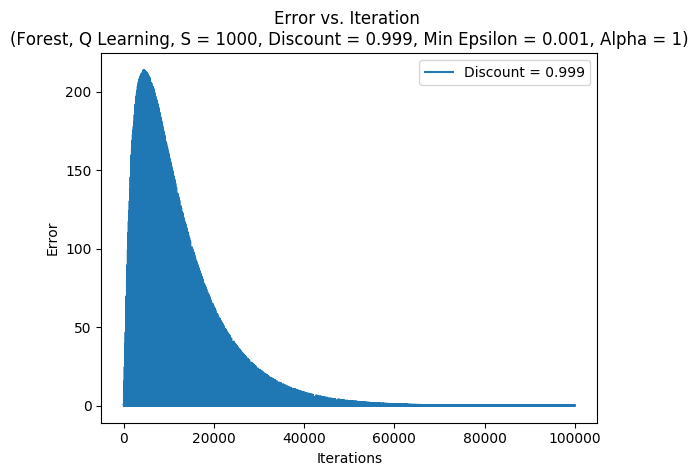

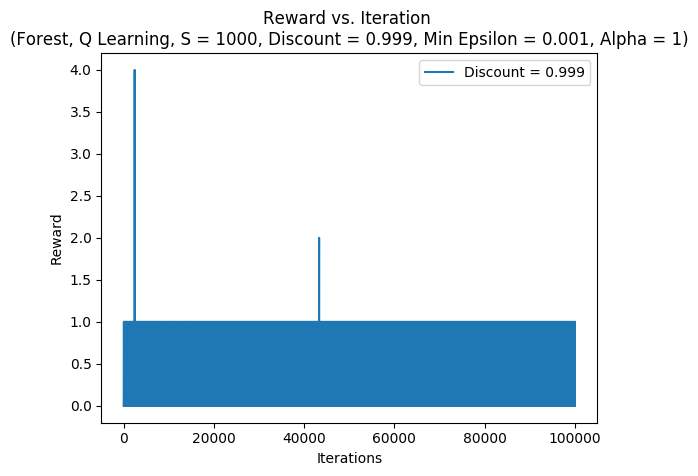

FOREST (1000) QL TIME:  7.591078042984009


In [247]:
# FOREST: Q LEARNING (1000)

np.random.seed(0)
P, R = example.forest(S=1000)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    ql = mdp.QLearning(P, R, discounts[i], n_iter=100000,
                   epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.rand(ql.S, ql.A)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Forest, Q Learning, S = 1000, Alpha = 1, Min Epsilon = 0.001)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Discount = " + str(discounts[i]))
    plt.legend(loc='best')
plt.show()
plt.close()

alphas = [0.1, 0.3, 0.5, 0.8, 0.9, 1]
for i in range(len(alphas)):
    ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
                   epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = alphas[i], alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.rand(ql.S, ql.A)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Forest, Q Learning, S = 1000, Discount = 0.999, Min Epsilon = 0.001)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Alpha = " + str(alphas[i]))
    plt.legend(loc='best')
plt.show()
plt.close()


ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
               epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
               alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
# Randomly intialize Q
ql.Q = np.random.rand(ql.S, ql.A)
ql.run()
ql_run_stats = ql.run_stats
plot_convergence_iterations(ql_run_stats, "Forest, Q Learning, S = 1000, Discount = 0.999, Min Epsilon = 0.001, Alpha = 1", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

plot_reward_iterations(ql_run_stats, "Forest, Q Learning, S = 1000, Discount = 0.999, Min Epsilon = 0.001, Alpha = 1", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

policy = ql.policy
forest_ql_1000_time = ql.time
print("FOREST (1000) QL TIME: ", forest_ql_1000_time)

In [248]:
print("FOREST (10) VI TIME: ", forest_vi_10_time)
print("FOREST (1000) VI TIME: ", forest_vi_1000_time)
print("FOREST (10) PI TIME: ", forest_pi_10_time)
print("FOREST (1000) PI TIME: ", forest_pi_1000_time)
print("FOREST (10) QL TIME: ", forest_ql_10_time)
print("FOREST (1000) QL TIME: ", forest_ql_1000_time)

FOREST (10) VI TIME:  0.004441976547241211
FOREST (1000) VI TIME:  0.09621095657348633
FOREST (10) PI TIME:  0.38623881340026855
FOREST (1000) PI TIME:  70.8638219833374
FOREST (10) QL TIME:  2.657099962234497
FOREST (1000) QL TIME:  7.591078042984009


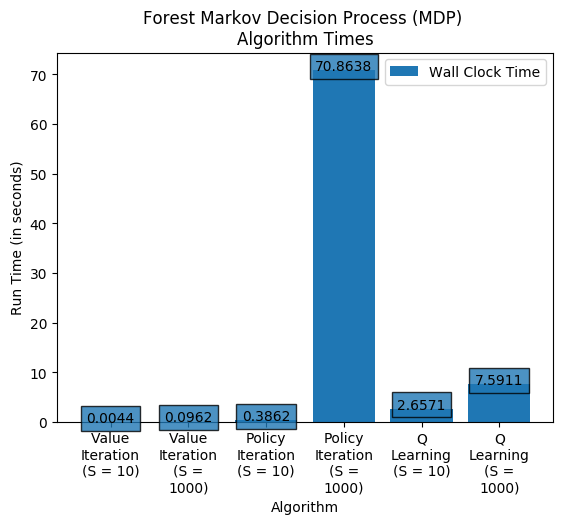

In [249]:
from textwrap import wrap

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(alpha =.8))

algorithms = ['Value Iteration (S = 10)', 'Value Iteration (S = 1000)','Policy Iteration (S = 10)', 'Policy Iteration (S = 1000)', 'Q Learning (S = 10)','Q Learning (S = 1000)']
times = [forest_vi_10_time, forest_vi_1000_time, forest_pi_10_time, forest_pi_1000_time, forest_ql_10_time, forest_ql_1000_time]
rounded_times = [round(i, 4) for i in times]
algorithms = ['\n'.join(wrap(x, 9)) for x in algorithms]
plt.title("Forest Markov Decision Process (MDP) \nAlgorithm Times")
plt.xlabel("Algorithm")
plt.ylabel("Run Time (in seconds)")
plt.bar(algorithms, rounded_times, label="Wall Clock Time")
addlabels(algorithms, rounded_times)
plt.legend(loc="best")
plt.show()